## Mounting Google Drive

In [0]:
from google.colab import drive, files
drive.mount("/content/drive")


##Обрабатываем датасет

Для начала загружаем все исходные данные, с которыми предстоит работать.

In [0]:
import pandas as pd

path = '/content/drive/My Drive/Colab Notebooks/Kyivstar/BigDataSchool_2019/'
hashed_data = pd.read_csv(f'{path}hashed_data.csv', index_col = 0)
tabular_data = pd.read_csv(f'{path}tabular_data.csv')
test_target = pd.read_csv(f'{path}test_target.csv', index_col = 0)
train_target = pd.read_csv(f'{path}train_target.csv', index_col = 0)

In [3]:
print(f"""Hashed: {hashed_data.shape}
Features: {tabular_data.shape}
Train target: {train_target.shape}
Test target: {test_target.shape}""")

Hashed: (39368, 1)
Features: (14581, 45)
Train target: (3871, 1)
Test target: (1000, 1)


### Фичи (tabular_data)

In [4]:
tabular_data.sample(5)

,PERIOD,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
4669,1,1561,30.0,25.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,30.0,0.0,268.82,966.45,964.73,0.00,0.0,0.0,1.72,0.0,0.0,0.0,603.776484,783.82,782.93,0.75,0.0,NaN,NaN,289.0,0.0,0.0,NaN,276.0,2.0,0.0,0.0,67.50,0.1150,25.0,614.726860,67.50,0.0,NaN
4075,1,1362,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,2.82,NaN,0.00,0.0,0.0,2.12,0.0,0.0,0.0,0.000000,262.52,258.73,3.55,0.0,0.0,11.0,8.0,0.0,0.0,164.0,157.0,6.0,0.0,NaN,27.00,0.4700,0.0,0.000000,0.00,NaN,0.0
6594,1,2205,30.0,29.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,30.0,3.0,161.68,505.18,497.68,5.75,0.0,0.0,1.75,0.0,NaN,0.0,NaN,567.95,543.75,24.20,0.0,0.0,226.0,217.0,3.0,0.0,195.0,173.0,22.0,0.0,0.0,59.80,2.7300,29.0,1268.649071,59.80,0.0,0.0
4357,1,1456,29.0,21.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,27.0,7.0,32.90,131.47,111.82,16.02,0.0,0.0,3.63,2.0,0.0,0.0,870.665279,122.83,118.13,4.70,0.0,0.0,145.0,105.0,14.0,0.0,112.0,105.0,7.0,0.0,0.0,56.55,0.7125,15.0,807.842591,56.55,0.0,NaN
2766,3,924,NaN,31.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,29.0,7.0,43.02,279.97,271.70,8.27,0.0,NaN,0.00,0.0,0.0,NaN,2858.154431,267.78,260.83,6.95,0.0,0.0,147.0,NaN,10.0,0.0,173.0,165.0,8.0,0.0,0.0,46.50,0.5550,31.0,2855.316761,46.50,0.0,0.0


Проверим, если ли в датасете значения NaN.

*PS. В предыдущих образцах мы видели явно NaN. Добавим проверку для тех случаем, когда явно его не будет видно, к примеру, одно значение на весь датасет*

In [5]:
# проверяем, есть ли пропущенные значения
tabular_data.isnull().values.any()

True

In [6]:
# суммарно пропущенно значений
tabular_data.isnull().sum(axis=1)

0        3
1        6
2        3
3        7
4        2
        ..
14576    2
14577    4
14578    2
14579    6
14580    1
Length: 14581, dtype: int64

In [0]:
# Заменим все значения NAN на средние по столбцу.
df = tabular_data.fillna(tabular_data.mean())

In [8]:
df.isnull().values.any()

False

**Вывод:** новый датасет после замены всех значений NaN записали в переменную `df`. Возможно, мы еще вернумся к исходному датасету, чтобы проекспериментировать с пустыми значениями NaN в нем, к примеру, заменить их на 0.

#### Периоды

Как видим, данные представлены за несколько периодов. Чтобы в дальнейшем работать с ними, объединим их для каждого ID

In [9]:
df.head(5)

,PERIOD,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
0,1,1,27.00000,0.000000,0.000000,1.00000,1.0,0.000000,0.0,0.00000,0.047095,27.000000,2.0,63.480000,230.43,226.18,3.92,0.0,0.0,0.330000,0.000000,0.000000,0.0,0.0,92.77,82.12,10.65,0.000000,0.000000,117.0,112.0,2.0,0.316575,35.0,30.0,12.627942,0.0,0.000000,45.53,1.055000,0.000000,0.0,45.53,0.0,0.0
1,2,1,19.00000,0.000000,1.386014,1.00000,1.0,0.000000,1.0,0.00000,0.047095,19.000000,2.0,95.176874,134.75,132.03,2.03,0.0,0.0,0.690000,1.000000,0.000000,0.0,0.0,162.48,162.48,0.00,0.000000,0.055994,54.0,48.0,2.0,0.000000,44.0,44.0,0.000000,0.0,0.000000,48.00,10.012062,7.978923,0.0,48.00,0.0,0.0
2,3,1,22.00000,0.000000,0.000000,0.93485,1.0,0.000000,0.0,0.00000,0.000000,22.000000,1.0,21.980000,159.08,158.08,1.00,0.0,0.0,0.000000,0.000000,1.016103,0.0,0.0,180.90,180.90,0.00,0.000000,0.000000,39.0,38.0,1.0,0.000000,33.0,33.0,0.000000,0.0,0.048565,46.59,0.000000,0.000000,0.0,46.59,0.0,0.0
3,1,2,22.33892,9.578704,0.000000,1.00000,1.0,0.040571,0.0,0.49356,0.000000,21.368445,4.0,2.200000,175.97,164.92,11.00,0.0,0.0,0.050000,3.996811,0.000000,0.0,0.0,281.68,259.63,22.05,3.581846,0.000000,109.0,103.0,4.0,0.000000,152.0,143.0,9.000000,0.0,0.000000,157.50,3.307500,0.000000,0.0,157.50,0.0,0.0
4,2,2,28.00000,0.000000,0.000000,1.00000,1.0,0.000000,0.0,0.00000,0.000000,28.000000,8.0,73.930000,367.20,339.73,27.47,0.0,0.0,2.932144,0.000000,0.000000,0.0,0.0,504.13,479.53,24.60,0.000000,0.000000,233.0,222.0,11.0,0.000000,288.0,279.0,12.627942,0.0,0.000000,157.50,3.640000,0.000000,0.0,157.50,0.0,0.0


In [10]:
# Получим название колонок
arr = df.columns.values
arr

array(['PERIOD', 'ID', 'V_1', 'V_2', 'V_3', 'V_4', 'V_5', 'V_6', 'V_7',
       'V_8', 'V_9', 'V_10', 'V_11', 'V_12', 'V_13', 'V_14', 'V_15',
       'V_16', 'V_17', 'V_18', 'V_19', 'V_20', 'V_21', 'V_22', 'V_23',
       'V_24', 'V_25', 'V_26', 'V_27', 'V_28', 'V_29', 'V_30', 'V_31',
       'V_32', 'V_33', 'V_34', 'V_35', 'V_36', 'V_37', 'V_38', 'V_39',
       'V_40', 'V_41', 'V_42', 'V_43'], dtype=object)

In [11]:
# Создадим новый массив, который далее будем использовать для объединения значений колонок по ID
arr_ = []
a = ": 'mean'"
for i in range(len(arr)):
  arr_.append("'"+arr[i]+"'"+a)

for i in range(2, len(arr_)):
    print(arr_[i]+", ", end=' ')
    if (i-1)%5==0:
      print()

'V_1': 'mean',  'V_2': 'mean',  'V_3': 'mean',  'V_4': 'mean',  'V_5': 'mean',  
'V_6': 'mean',  'V_7': 'mean',  'V_8': 'mean',  'V_9': 'mean',  'V_10': 'mean',  
'V_11': 'mean',  'V_12': 'mean',  'V_13': 'mean',  'V_14': 'mean',  'V_15': 'mean',  
'V_16': 'mean',  'V_17': 'mean',  'V_18': 'mean',  'V_19': 'mean',  'V_20': 'mean',  
'V_21': 'mean',  'V_22': 'mean',  'V_23': 'mean',  'V_24': 'mean',  'V_25': 'mean',  
'V_26': 'mean',  'V_27': 'mean',  'V_28': 'mean',  'V_29': 'mean',  'V_30': 'mean',  
'V_31': 'mean',  'V_32': 'mean',  'V_33': 'mean',  'V_34': 'mean',  'V_35': 'mean',  
'V_36': 'mean',  'V_37': 'mean',  'V_38': 'mean',  'V_39': 'mean',  'V_40': 'mean',  
'V_41': 'mean',  'V_42': 'mean',  'V_43': 'mean',  

In [0]:
# Объединяем столбцы с одинаковым ID, и находим среднее по каждому периоду
df_periods = df.groupby('ID').agg({'V_1': 'mean',  'V_2': 'mean',  'V_3': 'mean',  'V_4': 'mean',  'V_5': 'mean',  
'V_6': 'mean',  'V_7': 'mean',  'V_8': 'mean',  'V_9': 'mean',  'V_10': 'mean',  
'V_11': 'mean',  'V_12': 'mean',  'V_13': 'mean',  'V_14': 'mean',  'V_15': 'mean',  
'V_16': 'mean',  'V_17': 'mean',  'V_18': 'mean',  'V_19': 'mean',  'V_20': 'mean',  
'V_21': 'mean',  'V_22': 'mean',  'V_23': 'mean',  'V_24': 'mean',  'V_25': 'mean',  
'V_26': 'mean',  'V_27': 'mean',  'V_28': 'mean',  'V_29': 'mean',  'V_30': 'mean',  
'V_31': 'mean',  'V_32': 'mean',  'V_33': 'mean',  'V_34': 'mean',  'V_35': 'mean',  
'V_36': 'mean',  'V_37': 'mean',  'V_38': 'mean',  'V_39': 'mean',  'V_40': 'mean',  
'V_41': 'mean',  'V_42': 'mean',  'V_43': 'mean'})

In [13]:
df_periods.head(5)

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.666667,0.000000,0.462005,0.978283,1.000000,0.000000,0.333333,0.00000,0.031396,22.666667,1.666667,60.212291,174.753333,172.096667,2.316667,0.000000,0.0,0.340000,0.333333,0.338701,0.000000,0.000000,145.383333,141.833333,3.550000,0.000000,0.018665,70.000000,66.000000,1.666667,0.105525,37.333333,35.666667,4.209314,0.000000,0.016188,46.706667,3.689021,2.659641,0.000000,46.706667,0.00000,0.000000
2,25.779640,3.192901,0.000000,1.000000,1.000000,0.013524,0.000000,0.16452,0.000000,25.122815,6.333333,28.686667,258.413333,237.283333,20.796667,0.000000,0.0,1.310715,1.332270,0.338701,0.000000,0.000000,397.135843,328.536667,17.373333,1.193949,0.000000,158.000000,148.000000,8.800792,0.000000,198.000000,190.333333,8.875981,0.000000,0.000000,129.419388,2.589167,2.659641,0.000000,157.500000,0.29268,0.000000
3,26.666667,20.000000,3.333333,1.000000,1.000000,0.000000,1.000000,1.00000,0.333333,26.666667,13.000000,30.173333,450.926667,401.893333,33.090000,0.000000,0.0,2.590715,4.333333,1.333333,0.000000,2334.732031,475.443333,442.556667,32.886667,0.006667,0.000000,186.000000,147.699581,20.333333,0.000000,160.491503,149.333333,14.333333,0.333333,0.016188,184.576055,67.267404,19.000000,2185.660475,239.470000,2.00000,13.348697
4,21.333333,23.000000,0.795338,1.000000,1.000000,0.013524,0.666667,1.00000,0.031396,19.666667,7.333333,111.138958,388.513333,355.393333,32.690000,0.000000,0.0,0.430000,9.000000,0.333333,0.000000,5431.893561,204.656667,214.958911,10.700000,1.200615,0.000000,85.000000,96.366247,7.467459,0.000000,59.333333,49.333333,9.666667,0.419506,0.000000,95.000000,1.589311,23.000000,7233.322033,95.000000,0.00000,0.000000
5,27.666667,0.000000,0.000000,1.000000,0.551339,0.013524,0.112155,0.00000,0.000000,24.789482,0.333333,52.666667,186.326667,182.043333,0.710000,0.449117,0.0,3.573333,2.664541,0.000000,0.051426,0.000000,280.949177,196.246667,14.859835,0.000000,0.000000,107.333333,102.699581,4.134125,0.000000,101.000000,100.000000,1.000000,0.000000,0.000000,62.752721,0.271944,0.000000,0.000000,59.166667,0.29268,0.000000


**Вывод:** теперь у нас есть датасет `df_periods`, с которым можно работать

### Лейблы (test_target, train_target) 

Считаем часть нулей и единиц в обучающей выборке

In [14]:
train_target['TARGET'].value_counts(normalize=True)

0    0.717902
1    0.282098
Name: TARGET, dtype: float64

**Вывод:** у 28,2 % абонентов есть дети.

### Категориальные признаки (hashed_data)

In [15]:
hashed_data.head()

,HASH
ID,
1,045344e350db36e5aa27d44707026c693b6fbc51334849...
1,0da6f000eee23b4abe52552caaa9ae50a43bb7035ea546...
2,bb375651ea14bd2a97b0bd2a11e272632c2a4e432d3e6b...
2,deb9f62d9f47a9f8eebf4173a114eb849c2efca1d82f13...
2,34757104bdbaa55abc049fb2efad6ea1d449fbba455793...


In [16]:
hashed_data.describe()

,HASH
count,39368
unique,4112
top,045344e350db36e5aa27d44707026c693b6fbc51334849...
freq,4868


## Делим датасет на x_train, y_train и x_test, y_test

In [0]:
X = df_periods.merge(train_target, on=['ID'])

In [18]:
X.sample(5)

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2027,30.666667,1.333333,0.462005,1.000000,0.666667,0.0,0.000000,0.666667,0.015698,30.000000,5.666667,163.066667,755.723333,736.790000,18.080000,0.000000,0.000000,1.700715,0.000000,0.000000,0.000000,497.247034,1521.443333,1467.916667,21.524753,0.000000,0.0,184.666667,166.666667,8.333333,0.000000,235.333333,225.333333,10.000000,0.000000,0.016188,38.200000,10.461521,0.000000,0.000000,46.849210,0.000000,0.000000,0
2140,21.446307,22.666667,1.257343,1.000000,1.000000,0.0,0.333333,0.831187,0.000000,21.333333,9.000000,93.145625,241.286667,215.783333,22.516667,0.000000,0.000000,2.986667,0.000000,1.333333,0.051426,2878.157244,248.100000,223.696667,23.763333,1.193949,0.0,199.816409,138.333333,15.333333,0.105525,113.579085,117.333333,15.542647,0.000000,0.000000,38.400000,24.672422,18.666667,1898.999255,38.400000,0.666667,71.123469,0
1460,18.112973,0.000000,0.000000,0.978283,0.884673,0.0,0.000000,0.164520,0.000000,14.333333,3.666667,8.210000,38.766667,29.983333,11.859096,0.449117,0.000000,0.076667,0.000000,0.338701,0.000000,0.000000,37.576667,36.210000,1.366667,0.000000,0.0,35.333333,97.065828,4.666667,0.000000,21.666667,20.666667,1.000000,0.209753,0.000000,30.933333,3.509854,0.000000,0.000000,30.933333,0.292680,54.385178,0
2332,27.000000,23.192901,0.000000,1.000000,0.666667,0.0,0.000000,0.831187,0.000000,26.333333,0.666667,77.828958,223.177247,190.303333,0.200000,0.000000,0.000000,2.296667,0.000000,0.000000,0.025713,1389.786380,472.939177,391.438911,7.676667,0.000000,0.0,121.816409,107.333333,0.666667,0.000000,173.912418,166.666667,8.666667,0.000000,0.000000,145.000000,3.984743,22.992974,1080.118108,145.000000,0.000000,54.385178,0
3390,28.666667,30.666667,2.000000,1.000000,0.666667,0.0,1.000000,1.000000,0.333333,28.666667,2.000000,52.096667,367.170580,328.486667,9.179096,0.449117,0.045812,5.096667,2.333333,0.666667,0.000000,891.346472,258.146667,202.450000,55.593333,0.100000,0.0,198.000000,161.699581,4.000000,0.000000,162.912418,134.886509,19.666667,0.333333,0.000000,56.090000,8.707346,23.326308,840.324532,71.939210,0.000000,54.385178,0


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X.drop(["TARGET"], axis=1),
    train_target, 
    test_size = 0.3, 
    random_state = 50)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2709, 43), (1162, 43), (2709, 1), (1162, 1))

**Вывод:** у нас есть датасет `X` с данными по клиентам, а также информацией о смене пакета (0 или 1). Так мы сможем создать набор данных для обучения и тестирования модели.

##Обучение модели

### Случайный лес

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Создаём модель леса из сотни деревьев
model = RandomForestClassifier(n_estimators=100,
                               random_state=50,
                               max_features = 'sqrt')
# Обучаем на тренировочных данных
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Будем выдавать информацию о данных

In [0]:
# Действующая классификация
rf_predictions = model.predict(x_test)
# Вероятности для каждого класса
rf_probs = model.predict_proba(x_test)[:, 1]

In [23]:
print(f"Classifier[:5]: \t{rf_predictions[:5]}\nProba[:5]: \t\t{rf_probs[:5]}")

Classifier[:5]: 	[0 0 0 0 0]
Proba[:5]: 		[0.42 0.41 0.39 0.37 0.2 ]


Рассчитаем прогнозы классификации `predict` наряду с прогностической вероятностью predict_proba, чтобы вычислить ROC AUC.

In [0]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [25]:
def truncate(f, n):
  even, broken = str(f).split('.')
  return float(even + '.' + broken[0:n])
  
print(f"{truncate(roc_value, 2)*100} %")

66.0 %


### Оценивание модели ROC

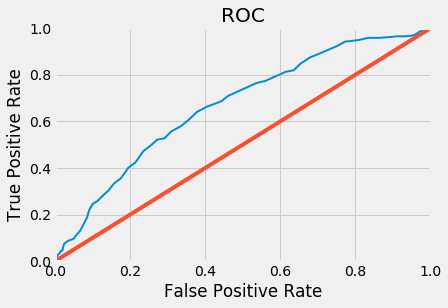

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(
    y_test, 
    model.predict_proba(x_test)[:,1], 
    pos_label=1)

plt.style.use('fivethirtyeight')
plt.plot(fpr, tpr, lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Прогнозирование

Подготовим выбоку с ID пользователей, о которых отсутствует информация TARGET. Будем предсказывать, есть ли у них дети.

In [0]:
Y = df_periods.merge(train_target, on=['ID'], how='left')

In [28]:
Y.head(5)

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.666667,0.000000,0.462005,0.978283,1.000000,0.000000,0.333333,0.00000,0.031396,22.666667,1.666667,60.212291,174.753333,172.096667,2.316667,0.000000,0.0,0.340000,0.333333,0.338701,0.000000,0.000000,145.383333,141.833333,3.550000,0.000000,0.018665,70.000000,66.000000,1.666667,0.105525,37.333333,35.666667,4.209314,0.000000,0.016188,46.706667,3.689021,2.659641,0.000000,46.706667,0.00000,0.000000,0.0
2,25.779640,3.192901,0.000000,1.000000,1.000000,0.013524,0.000000,0.16452,0.000000,25.122815,6.333333,28.686667,258.413333,237.283333,20.796667,0.000000,0.0,1.310715,1.332270,0.338701,0.000000,0.000000,397.135843,328.536667,17.373333,1.193949,0.000000,158.000000,148.000000,8.800792,0.000000,198.000000,190.333333,8.875981,0.000000,0.000000,129.419388,2.589167,2.659641,0.000000,157.500000,0.29268,0.000000,0.0
3,26.666667,20.000000,3.333333,1.000000,1.000000,0.000000,1.000000,1.00000,0.333333,26.666667,13.000000,30.173333,450.926667,401.893333,33.090000,0.000000,0.0,2.590715,4.333333,1.333333,0.000000,2334.732031,475.443333,442.556667,32.886667,0.006667,0.000000,186.000000,147.699581,20.333333,0.000000,160.491503,149.333333,14.333333,0.333333,0.016188,184.576055,67.267404,19.000000,2185.660475,239.470000,2.00000,13.348697,0.0
4,21.333333,23.000000,0.795338,1.000000,1.000000,0.013524,0.666667,1.00000,0.031396,19.666667,7.333333,111.138958,388.513333,355.393333,32.690000,0.000000,0.0,0.430000,9.000000,0.333333,0.000000,5431.893561,204.656667,214.958911,10.700000,1.200615,0.000000,85.000000,96.366247,7.467459,0.000000,59.333333,49.333333,9.666667,0.419506,0.000000,95.000000,1.589311,23.000000,7233.322033,95.000000,0.00000,0.000000,0.0
5,27.666667,0.000000,0.000000,1.000000,0.551339,0.013524,0.112155,0.00000,0.000000,24.789482,0.333333,52.666667,186.326667,182.043333,0.710000,0.449117,0.0,3.573333,2.664541,0.000000,0.051426,0.000000,280.949177,196.246667,14.859835,0.000000,0.000000,107.333333,102.699581,4.134125,0.000000,101.000000,100.000000,1.000000,0.000000,0.000000,62.752721,0.271944,0.000000,0.000000,59.166667,0.29268,0.000000,0.0


In [29]:
# Посмотрим, какое соотношение 0 и 1 в обучающей выборке
Y.TARGET.value_counts()

0.0    2779
1.0    1092
Name: TARGET, dtype: int64

In [0]:
# добавляем -1 в ячейки с отсутствующими значениями
Y_ = Y[(Y['TARGET'] != 0) & (Y['TARGET'] != 1)]
Y_ = Y_.fillna(-1)

In [31]:
Y_.head(5)

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3872,0.666667,0.000000,0.462005,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,7.789482,1.636871,0.416667,0.666667,257.236880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.386667,16.196667,1.190000,0.000000,0.018665,51.816409,1.000000,0.000000,0.000000,6.333333,4.333333,4.875981,0.209753,0.000000,0.000000,0.180833,2.659641,0.000000,0.000000,0.29268,0.0,-1.0
3873,25.333333,2.666667,1.386014,0.978283,0.333333,0.013524,0.000000,0.333333,0.000000,23.789482,0.333333,192.316667,1052.116667,1051.616667,0.500000,0.000000,0.000000,0.977381,0.000000,0.000000,0.000000,87.562523,439.213333,430.170000,9.033333,0.006667,0.000000,139.333333,139.000000,0.333333,0.105525,114.245752,91.333333,9.209314,0.543087,0.016188,33.996667,1.381517,1.666667,84.778989,33.996667,0.00000,0.0,-1.0
3874,30.333333,30.333333,5.333333,1.000000,1.000000,0.000000,1.000000,0.662373,0.000000,30.333333,9.333333,60.813333,405.237247,299.110000,36.949096,0.000000,0.000000,0.550000,13.333333,1.666667,0.000000,9554.271864,301.373333,295.876667,14.566502,1.193949,0.000000,178.666667,163.732495,15.666667,0.105525,173.333333,167.666667,5.000000,0.333333,0.000000,98.333333,0.760144,30.333333,12769.593670,98.333333,0.00000,0.0,-1.0
3875,24.666667,0.000000,0.666667,1.000000,0.551339,0.000000,0.333333,0.164520,0.000000,24.666667,0.333333,60.635625,320.263914,290.826667,0.076667,0.449117,0.045812,0.040000,0.666667,0.000000,0.000000,0.000000,250.695843,171.750000,3.396667,0.000000,0.000000,109.333333,132.732495,0.333333,0.000000,67.333333,61.333333,6.000000,0.209753,0.000000,61.086055,0.261667,2.659641,0.000000,69.547631,0.00000,0.0,-1.0
3876,9.000000,0.000000,0.462005,1.000000,0.000000,0.000000,0.000000,0.329040,0.015698,7.333333,1.636871,2.573333,10.640000,138.651773,0.000000,0.000000,0.000000,0.140000,1.332270,0.000000,0.025713,0.000000,150.775843,53.660000,16.206667,0.000000,0.000000,22.666667,19.666667,0.000000,0.105525,32.666667,27.000000,5.666667,0.000000,0.000000,0.000000,3.974021,0.000000,0.000000,23.182544,0.29268,0.0,-1.0


In [32]:
Y_.index

Int64Index([3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881,
            ...
            4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871],
           dtype='int64', name='ID', length=1000)

**Вывод:** на данный момент у нас есть датасет с фичами всех пользователей, о которых отсутствует информация

In [0]:
y_pred = model.predict_proba(Y_.drop(["TARGET"], axis=1))[:, 1]

In [0]:
y_target = []
for i in y_pred:
  if i <= 0.49:
    y_target.append(0)
  else:
    y_target.append(1)

In [0]:
Y_result = pd.DataFrame({
    "ID": Y_.index,
    "SCORE": y_pred,
    "TARGET": y_target
})

In [41]:
Y_result.head(5)

,ID,SCORE,TARGET
0,3872,0.12,0
1,3873,0.37,0
2,3874,0.50,1
3,3875,0.14,0
4,3876,0.23,0


In [42]:
# Y_result['TARGET'].value_counts(normalize=True)
Y_result.TARGET.value_counts(normalize=True)

0    0.902
1    0.098
Name: TARGET, dtype: float64

**Вывод:** только у 0,9 % абонентов есть дети до 14 лет.

### Сохраняем результаты

In [0]:
Y_result.to_csv(f'{path}result.csv', columns=['ID', 'SCORE'], index=False)

In [0]:
import csv

csv_file = f'{path}result.csv'
txt_file = f'{path}my_test.txt'

with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [my_output_file.write(",".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()